## ResNet 안면 Multi-Label (성별/나이) Classification

In [1]:
pip install git+https://github.com/keras-team/keras-preprocessing.git

  Cloning https://github.com/keras-team/keras-preprocessing.git to c:\users\user\appdata\local\temp\pip-req-build-n0j2q33u
  Resolved https://github.com/keras-team/keras-preprocessing.git to commit 3e380065d4afc7347aaee8d89325a16b22158438
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-preprocessing.git 'C:\Users\user\AppData\Local\Temp\pip-req-build-n0j2q33u'

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tqdm import tqdm
from time import perf_counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

In [5]:
df=pd.read_csv('/project/data/FamilyData/Val/FamilyData_Val_DF.csv',index_col=0)

In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, random_state=777, test_size=0.2)
train_df, val_df = train_test_split(train_df, random_state=777, test_size=0.2)

len(train_df) , len(val_df), len(test_df)

(2048, 512, 640)

In [8]:
columns=["M","F","0's","10's","20's","30's","40's","50's","60+"]

In [9]:
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [10]:
train_generator=datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='C:/Preprocessed_Datasets(FamilyData_Val)',
    x_col="img_path",
    y_col=columns,
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="other",
    target_size=(224,224))

Found 2048 validated image filenames.


In [11]:
valid_generator=test_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='C:/Preprocessed_Datasets(FamilyData_Val)',
    x_col="img_path",
    y_col=columns,
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="other",
    target_size=(224,224))

Found 512 validated image filenames.


In [12]:
test_generator=test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='C:/Preprocessed_Datasets(FamilyData_Val)',
    x_col="img_path",
    y_col=columns,
    batch_size=1,
    seed=42,
    shuffle=False,
    class_mode="other", #None
    target_size=(224,224))

Found 640 validated image filenames.


In [13]:
#model
from keras.applications import ResNet50

ResNet50 = ResNet50(weights='imagenet',
              include_top=False, 
              input_shape = (224,224,3))


In [14]:
ResNet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [15]:
model = models.Sequential()
model.add(ResNet50)

model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(9,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 9)                 585       
                                                                 
Total params: 49,295,113
Trainable params: 49,241,993
Non-trainable params: 53,120
_________________________________________________________________


In [16]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 0.00005),
              metrics = ['accuracy'])

In [17]:
%%time

Hist_dandc = model.fit(train_generator,
                        # steps_per_epoch=STEP_SIZE_TRAIN,
                        validation_data=valid_generator,
                        # validation_steps=STEP_SIZE_VALID,
                        epochs=20)

Epoch 1/20
64/64 [==============================] - 309s 5s/step - loss: 0.3195 - accuracy: 0.8652 - val_loss: 0.5114 - val_accuracy: 0.4902
Epoch 2/20
64/64 [==============================] - 314s 5s/step - loss: 0.0471 - accuracy: 0.9438 - val_loss: 0.5693 - val_accuracy: 0.4844
Epoch 3/20
64/64 [==============================] - 423s 7s/step - loss: 0.0095 - accuracy: 0.9268 - val_loss: 0.5870 - val_accuracy: 0.4863
Epoch 4/20
64/64 [==============================] - 417s 7s/step - loss: 0.0033 - accuracy: 0.9180 - val_loss: 0.6242 - val_accuracy: 0.4863
Epoch 5/20
64/64 [==============================] - 465s 7s/step - loss: 0.0018 - accuracy: 0.9375 - val_loss: 0.6280 - val_accuracy: 0.4844
Epoch 6/20
64/64 [==============================] - 470s 7s/step - loss: 0.0012 - accuracy: 0.9409 - val_loss: 0.6091 - val_accuracy: 0.4824
Epoch 7/20
64/64 [==============================] - 459s 7s/step - loss: 8.2319e-04 - accuracy: 0.9458 - val_loss: 0.6091 - val_accuracy: 0.4824
Epoch 8/2

In [18]:
model.save('C:/project/ResNet50.h5')

In [19]:
loss, accuracy = model.evaluate(test_generator)
print(Hist_dandc.history['val_loss'])
print(Hist_dandc.history['loss'])

640/640 [==============================] - 57s 90ms/step - loss: 0.2196 - accuracy: 0.9391
[0.5114424824714661, 0.5693152546882629, 0.5870201587677002, 0.6241783499717712, 0.6279881596565247, 0.6091405749320984, 0.6090865135192871, 0.6404443979263306, 0.6923559308052063, 0.7494174242019653, 0.7971693873405457, 0.8004070520401001, 0.6794660091400146, 0.5438891649246216, 0.39436057209968567, 0.2970272898674011, 0.2503472566604614, 0.2236909419298172, 0.20796597003936768, 0.20426277816295624]
[0.31954896450042725, 0.04709556698799133, 0.00954065565019846, 0.0032754489220678806, 0.001779157784767449, 0.0011592350201681256, 0.0008231926476582885, 0.0006139922770671546, 0.0004773821565322578, 0.0003919716982636601, 0.0003378074907232076, 0.0002725542872212827, 0.0002285131049575284, 0.00021200095943640918, 0.00018356334476266056, 0.00016212477930821478, 0.00013637954543810338, 0.0001185307337436825, 0.00011433240433689207, 9.436184336664155e-05]


In [39]:
print(test_df.iloc[i]['img_path'])

F0807_IND_D_9_45_01.JPG


1/1 [==============================] - 0s 76ms/step
[0.    1.    0.128 0.635 0.    0.    0.    0.    0.   ]
1/1 [==============================] - 0s 75ms/step
[0.    1.    0.    0.    0.    0.001 0.004 0.502 0.   ]
1/1 [==============================] - 0s 81ms/step
[1. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 79ms/step
[1.    0.    0.    0.243 0.013 0.    0.    0.    0.   ]
1/1 [==============================] - 0s 77ms/step
[0.    1.    0.    0.    0.    0.001 0.005 0.001 0.001]
1/1 [==============================] - 0s 73ms/step
[1.    0.    0.999 0.001 0.    0.    0.    0.    0.   ]
1/1 [==============================] - 0s 77ms/step
[1.    0.    0.    0.    0.    0.    0.218 0.012 0.005]
1/1 [==============================] - 0s 79ms/step
[1. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 77ms/step
[1. 0. 0. 0. 1. 0. 0. 0. 0.]
1/1 [==============================] - 0s 69ms/step
[0.    1.    0.    0.    0.001 0.    0.016 0.001 0.   ]


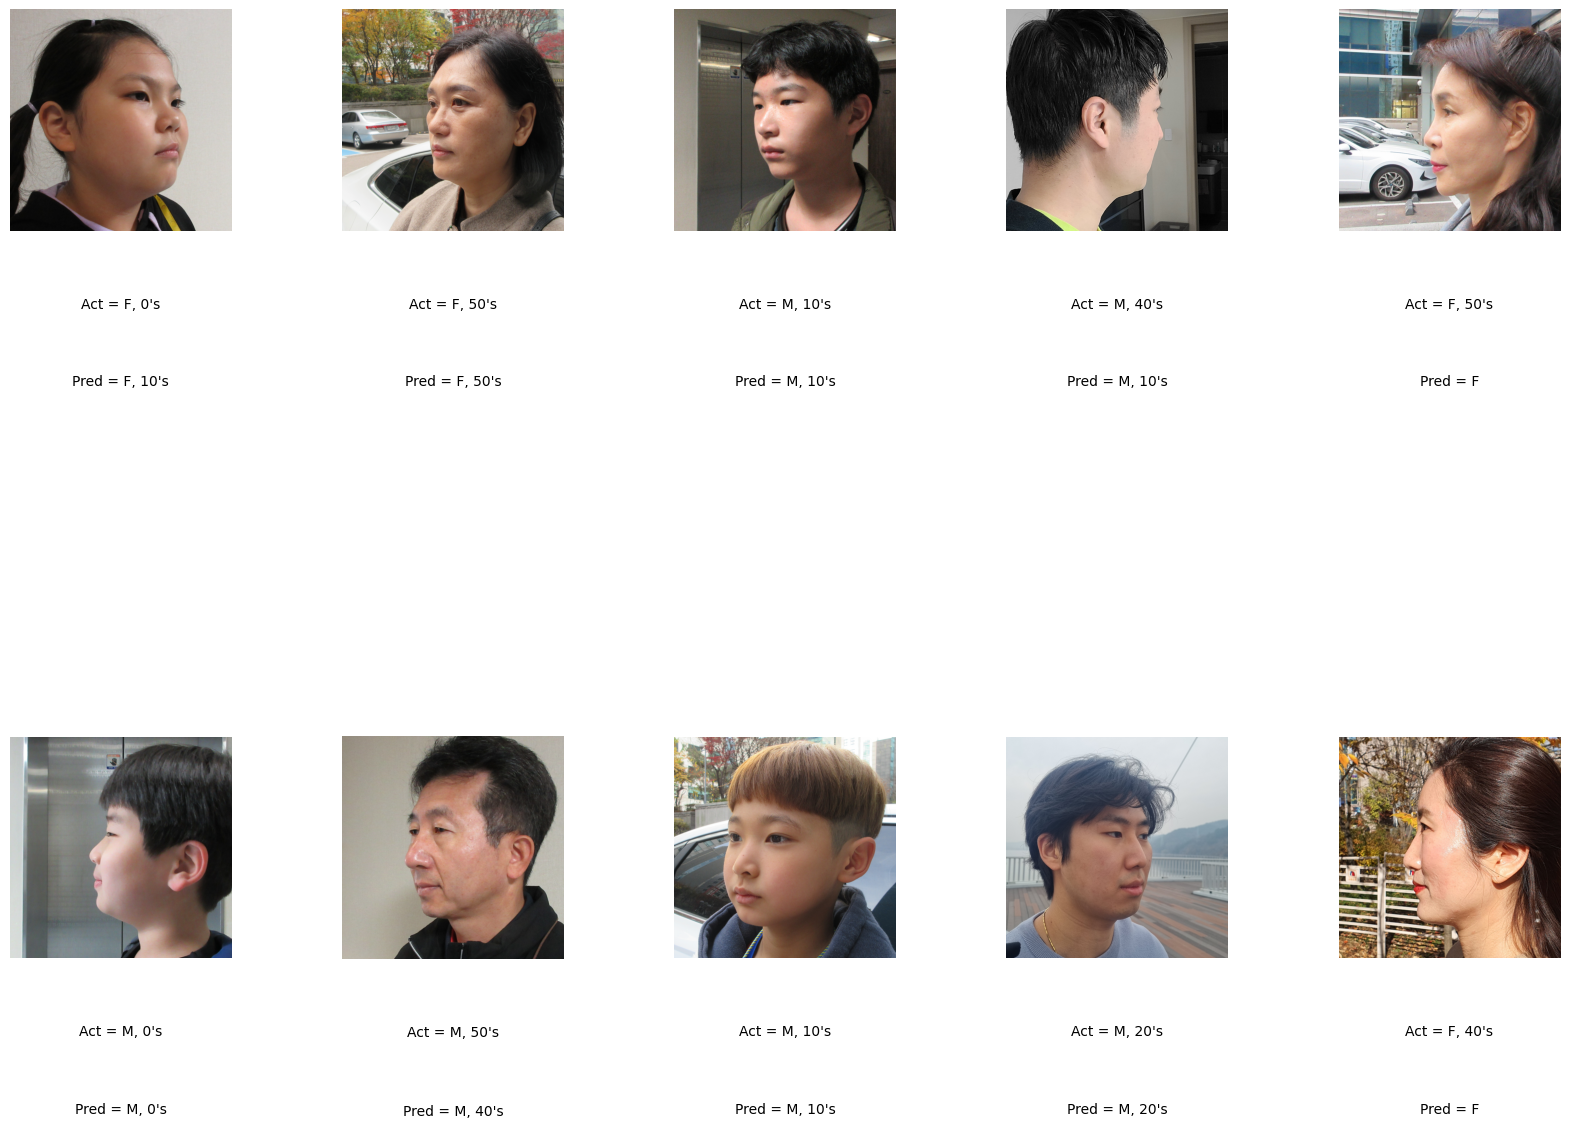

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import math

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.7, wspace=0.5)

directory = 'C:/Preprocessed_Datasets(FamilyData_Val)'  # 이미지 디렉토리 경로

for i in range(10):  # 10개의 이미지만 확인
    image_path = directory + '/' + test_df.iloc[i]['img_path']  # 이미지 경로 가져오기
    image = mpimg.imread(image_path)  # 이미지 읽기

    ax = fig.add_subplot(2, 5, i + 1)
    ax.axis('off')

    # 실제값 표시
    actual = test_df.iloc[i][columns]  # 컬럼 기반으로 해당하는 값 가져오기
    actual_labels = actual[actual == 1].index  # 1인 값의 인덱스 가져오기
    actual_labels_str = ', '.join(actual_labels)  # 인덱스를 문자열로 변환
    ax.text(0.5, -0.35,
            'Act = ' + str(actual_labels_str),
            fontsize=10,
            ha='center',
            transform=ax.transAxes)
    
    # 이미지 전처리 및 예측
    img = load_img(image_path, target_size=(224, 224))  # 이미지 사이즈 맞추기
    img_array = img_to_array(img)  # 이미지를 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)  # 차원 확장
    img_preprocessed = datagen.standardize(img_array)  # 데이터 전처리

    pred = model.predict(img_preprocessed)  # 예측 실행

    print(np.round(list(map(float,pred[0])), 3))
    pred_labels = (pred[0] > 0.2).astype(int)  # 임계값 설정
    pred_labels_list = pred_labels.tolist()  # numpy 배열을 리스트로 변환
    pred_labels_str = ', '.join([columns[i] for i in range(len(columns)) if pred_labels_list[i] == 1])  # 예측값 문자열 변환

    # 예측값 표시
    ax.text(0.5, -0.7,
            'Pred = ' + str(pred_labels_str),
            fontsize=10,
            ha='center',
            transform=ax.transAxes)

    ax.imshow(image)

plt.show()


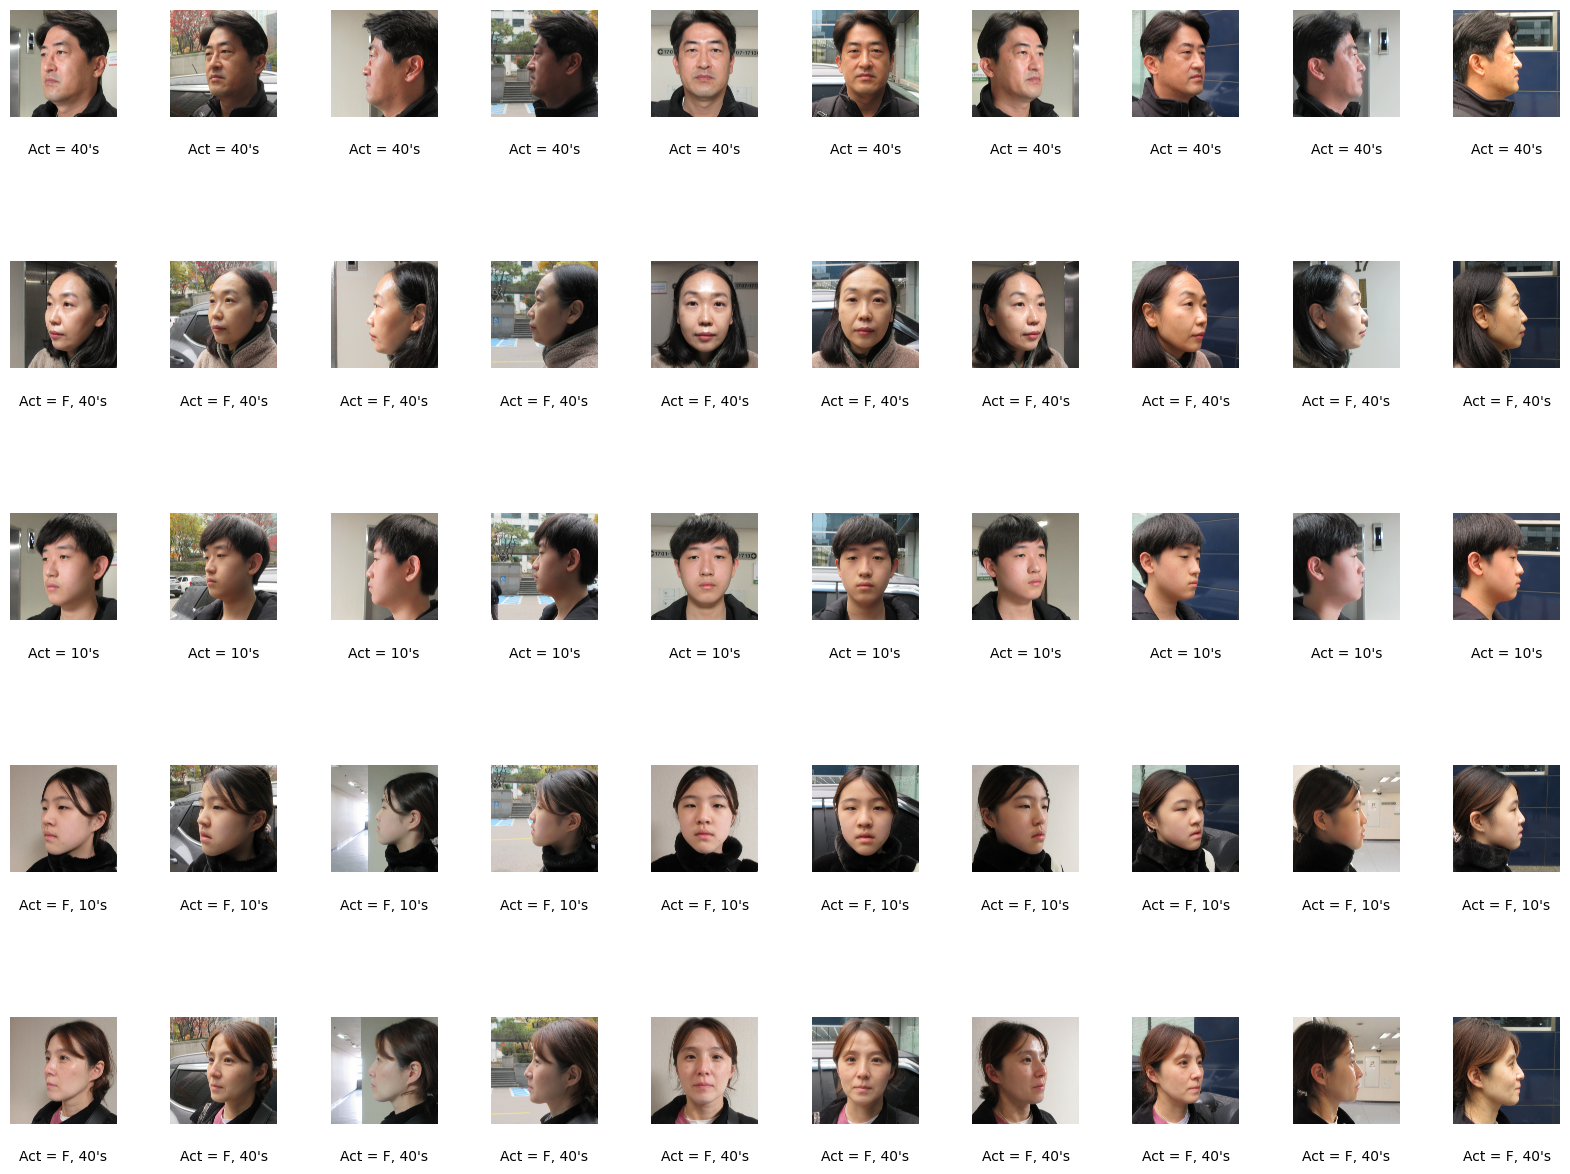

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.7, wspace=0.5)

directory = 'C:/Preprocessed_Datasets(FamilyData_Val)'  # 이미지 디렉토리 경로

for i in range(50):
    image_path = directory + '/' + df['img_path'][i]  # 이미지 경로 가져오기
    image = img.imread(image_path)  # 이미지 읽기
    
    ax = fig.add_subplot(5, 10, i + 1)
    ax.axis('off')
    
    # 실제값 표시
    actual = df.loc[i, columns[1:]]  # 컬럼 기반으로 해당하는 값 가져오기
    actual_labels = actual[actual == 1].index  # 1인 값의 인덱스 가져오기
    actual_labels_str = ', '.join(actual_labels)  # 인덱스를 문자열로 변환
    ax.text(0.5, -0.35,
            'Act = ' + str(actual_labels_str),
            fontsize=10,
            ha='center',
            transform=ax.transAxes)
    
    ax.imshow(image)
    
plt.show()
